## AF classification model training:
With the EcgResNet34 from the paper "Arrhythmia Classification Using CGAN-Augmented ECG Signals"

In [1]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
import os
from dataset import AF_dataset
import matplotlib.pyplot as plt
import numpy as np

c:\Users\nogak\miniconda3\envs\ECG_classification\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
%autoreload 2
%reload_ext autoreload

UsageError: Line magic function `%autoreload` not found.


In [12]:
folder_path = 'C:/Users/nogak/Desktop/MyMaster/YoachimsCourse/files/'
record_names = []
for file in os.listdir(folder_path):
    if file.endswith('.hea'):  # we find only the .hea files.
        if file[:-4] == '00735' or file[:-4] == '03665':
            continue
        record_names.append(file[:-4])  # we remove the extensions, keeping only the number itself.

#split records to training and test to 80% - 20%
num_of_train_records = round(len(record_names)*0.8)
train_records_names = record_names[:num_of_train_records]
test_records_names = record_names[num_of_train_records:]
print(f'{len(train_records_names)} records in the training set and {len(test_records_names)} records in the test set')

ds_train = AF_dataset(folder_path, train_records_names, sample_length=10, channel=0, overlap=False)
ds_test = AF_dataset(folder_path, test_records_names, sample_length=10, channel=0, overlap=False)

18 records in the training set and 5 records in the test set
created dataset with 65497 intervals , each with 2500 samples


Visual some of the examples:

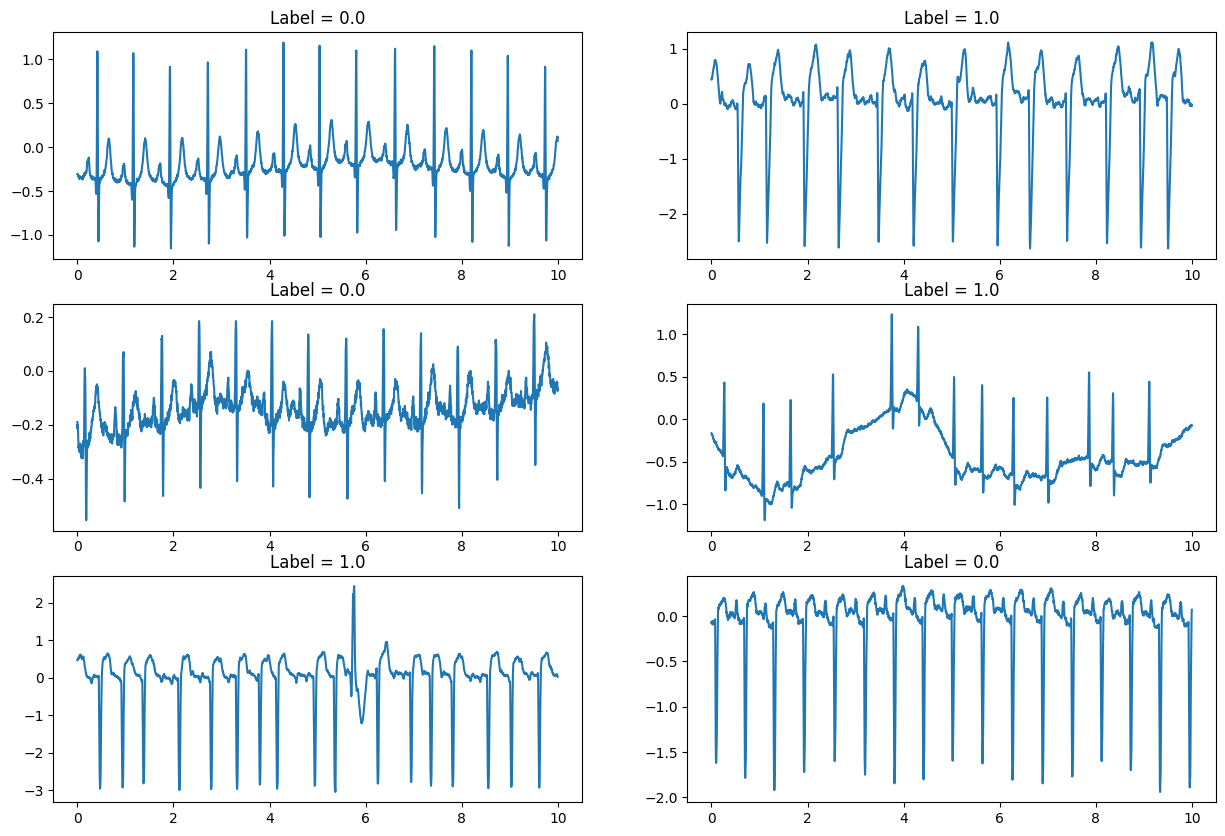

In [10]:
fs = ds_train.fs
plt.figure(figsize=(15,10))
for i, idx in enumerate(np.random.randint(0, len(ds_train) , 6)):
    signal, label = ds_train[idx]
    plt.subplot(3, 2, i + 1)
    t = np.arange(0, len(signal)/fs, 1/fs)
    plt.plot(t , signal)
    # plt.xlabel('time[sec]')
    plt.title(f'Label = {label}')
plt.show()


Load the network:

In [8]:
from model import EcgResNet34
net = EcgResNet34(num_classes=1)
#net.inplanes = 2500
print(net)



EcgResNet34(
  (conv1): Conv1d(1, 32, kernel_size=(17,), stride=(1,), padding=(8,), bias=False)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv1d(32, 64, kernel_size=(17,), stride=(1,), padding=(8,), bias=False)
      (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv1d(64, 64, kernel_size=(17,), stride=(1,), padding=(8,), bias=False)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.5, inplace=False)
      (downsample): Sequential(
        (0): Conv1d(32, 64, kernel_size=(1,), stride=(1,), bias=False)
        (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv1d(64, 128, kernel_si

In [9]:
#input a signal to the network
input = signal.unsqueeze(0).unsqueeze(0)
out = net(input)
out

tensor([[0.2814]], grad_fn=<AddmmBackward>)